In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df_club=pd.read_csv('../input/mind-graph/Clubs_data.csv')
df_club.head()

,Club_Name,Name,Event,Role
0,club_3,Darien Ma,club_3_event_2,Participant
1,club_2,Sege Schrock,club_2_event_1,Participant
2,club_3,Alison bci,club_3_event_2,Participant
3,club_1,kiara jauregui,club_1_event_1,Participant
4,club_2,Tete Buim,club_2_event_3,Participant


In [5]:
df_club.isnull().sum()

Club_Name    0
Name         0
Event        0
Role         0
dtype: int64

In [6]:
df_club.shape

(1046, 4)

In [7]:
df_club['Name'].nunique()

987

In [8]:
df_meta=pd.read_csv('../input/mind-graph/Metadata.csv')
df_meta.head()

,Name,ID
0,Annette Ahmed,18XJ1A0100
1,Zachery Clancy,18XJ1A0101
2,Jaquelin Duran,18XJ1A0102
3,Orlando Clemens,18XJ1A0103
4,Dorothy Mayhew,18XJ1A0104


In [9]:
df_meta.isnull().sum()

Name    0
ID      0
dtype: int64

In [10]:
print(df_meta['Name'].nunique())
df_meta.shape

500


(500, 2)

In [11]:
df_org=pd.read_csv('../input/mind-graph/Organisers_In_Fests.csv')
df_org.head()

,Fest_Name,Name,Role
0,fest_2,Stcerr Hbmond,organiser_2
1,fest_2,Ayliwn Slks,organiser_6
2,fest_2,Sebestien Hickjman,organiser_7
3,fest_2,Grechen Chlewsn,organiser_8
4,fest_1,Evelin B,organiser_1


In [12]:
print(df_org['Name'].nunique())
df_org.shape

20


(20, 3)

In [13]:
df_org['Name']

0          Stcerr Hbmond
1            Ayliwn Slks
2     Sebestien Hickjman
3        Grechen Chlewsn
4               Evelin B
5      leniez Gilbertson
6       mRiver Flipcieno
7               Leona Ca
8              Ay Kehnei
9          tbdulelh Hors
10             S Stephon
11         Prxry Pefryen
12             Derii Dai
13                    RB
14            Jordi Taem
15                    AM
16      Reshawn Balsdeas
17      Bline Mckesnezie
18        Ashanti John K
19        zoie mcdermott
Name: Name, dtype: object

In [14]:
df_org.isnull().sum()

Fest_Name    0
Name         0
Role         0
dtype: int64

In [15]:
df_part=pd.read_csv('../input/mind-graph/Participants_In_Fests.csv')
df_part.head()

,Fest_Name,Name,Event
0,fest_1,JenapRowli,fest_1_event_9
1,fest_1,Credyj Duenas,fest_1_event_4
2,fest_2,Jequqlin Duran,fest_2_event_1
3,fest_1,Keiyah widalgo,fest_1_event_4
4,fest_2,Elaine John S,fest_2_event_15


In [16]:
print(df_part['Name'].nunique())
df_part.shape

4060


(4769, 3)

In [17]:
df_part.isnull().sum()

Fest_Name    0
Name         0
Event        0
dtype: int64

In [18]:
#Import
import fuzzywuzzy
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

In [19]:
df1_names = list(df_meta['Name'].unique())
df2_names = list(df_org['Name'].unique())

In [20]:
def match_names(name, list_names, min_score=0):
    max_score = -1
    max_name = ''
    for x in list_names:
        score = fuzz.partial_ratio(name, x)
        if (score > min_score) & (score > max_score):
            max_name = x
            max_score = score
    return (max_name, max_score)

In [21]:
names = {}
for x in df2_names:
    match = match_names(x, df1_names, 45)
    if match[1] >=45:
        name =  str(match[0]) 
        names[x]=name

names

{'Stcerr Hbmond': 'Starr Hammond',
 'Ayliwn Slks': 'Aylin Seals',
 'Sebestien Hickjman': 'Sebastien Hickman',
 'Grechen Chlewsn': 'Gretchen Clawson',
 'Evelin B': 'Evelin Bradley',
 'leniez Gilbertson': 'Delanie Gilbertson',
 'mRiver Flipcieno': 'River Feliciano',
 'Leona Ca': 'Leona Cabral',
 'Ay Kehnei': 'Aya Kennedy',
 'tbdulelh Hors': 'Abdullah Horst',
 'S Stephon': 'Stephon Smoot',
 'Prxry Pefryen': 'Perry Perryman',
 'Derii Dai': 'Daria Daily',
 'RB': 'Genevieve Ratliff',
 'Jordi Taem': 'Jordi Tam',
 'AM': 'Annette Ahmed',
 'Reshawn Balsdeas': 'Rashawn Balderas',
 'Bline Mckesnezie': 'Blaine Mckenzie',
 'Ashanti John K': 'Ashanti Koenig',
 'zoie mcdermott': 'Zoie McDermott'}

In [22]:
df_org.Name = df_org.Name.map(names)

In [23]:
df_org['Name']

0          Starr Hammond
1            Aylin Seals
2      Sebastien Hickman
3       Gretchen Clawson
4         Evelin Bradley
5     Delanie Gilbertson
6        River Feliciano
7           Leona Cabral
8            Aya Kennedy
9         Abdullah Horst
10         Stephon Smoot
11        Perry Perryman
12           Daria Daily
13     Genevieve Ratliff
14             Jordi Tam
15         Annette Ahmed
16      Rashawn Balderas
17       Blaine Mckenzie
18        Ashanti Koenig
19        Zoie McDermott
Name: Name, dtype: object

In [24]:
df_org['Name'].nunique()

20

repeating the above process for df_part and df_club

In [25]:
df3_names = list(df_part['Name'].unique())
names = []
for x in df3_names:
    match = match_names(x, df1_names, 45)
    if match[1] >= 45:
        name = ((  str(x), str(match[0])  ))
        names.append(name)
name_part_dict = dict(names)


In [26]:
name_part_dict

{'JenapRowli': 'Jayna Rowley',
 'Credyj Duenas': 'Candy Duenas',
 'Jequqlin Duran': 'Jaquelin Duran',
 'Keiyah widalgo': 'Kaliyah Hidalgo',
 'Elaine John S': 'Elaine Sell',
 'Koljte Roend': 'Kolten Roland',
 'Sebestn sHickman': 'Sebastien Hickman',
 'GC': 'Zachery Clancy',
 'JevonteTrevibno': 'Javonte Trevino',
 'Luca S': 'Luca Sanders',
 'Iebelm Perals': 'Isabell Perales',
 'Mcknzie Frn': 'Mckenzie Finn',
 'HlyStroum': 'Holly Strom',
 'Monric Grabowhsy': 'Monica Grabowski',
 'Yesminez Sdler': 'Yasmine Sadler',
 'eyleigh Ktoenig': 'Kayleigh Koenig',
 'Shawn Ka': 'Shawn Kay',
 'Luiz McLxeuglin': 'Luiz McLaughlin',
 'Thee Mcoloud': 'Thea McCloud',
 'Elaine S': 'Elaine Sell',
 'vRlehul Va': 'Rahul Vera',
 'Judikt Cok': 'Judith Crook',
 'Yisrojal Stor': 'Yisroel Storm',
 'gerald arreola': 'Gerald Arreola',
 'Shawn John K': 'Shawn Kay',
 'uoedyBeder': 'Kody Bader',
 'CeylaRicnon': 'Cayla Rincon',
 'Gissase Thorntn': 'Gisselle Thornton',
 'Sereniy Cyestilo': 'Serenity Castillo',
 'DoiencMedi

In [27]:
df_part['Name'] = df_part['Name'].replace(name_part_dict)

In [28]:
len(name_part_dict)

3903

In [29]:
df_part['Name'].nunique()

542

In [30]:
df_part['Name'].isnull().sum()

0

In [31]:
df_part['Name']

0          Jayna Rowley
1          Candy Duenas
2        Jaquelin Duran
3       Kaliyah Hidalgo
4           Elaine Sell
             ...       
4764    Candace Barkley
4765    Debra Clevenger
4766      Theron Stroud
4767     Branson Harman
4768      Jadon Vandyke
Name: Name, Length: 4769, dtype: object

In [32]:
df4_names = list(df_club['Name'].unique())
names = []
for x in df4_names:
    match = match_names(x, df1_names, 45)
    if match[1] >= 45:
        name = ((  str(x), str(match[0])  ))
        names.append(name)
name_club_dict = dict(names)


In [33]:
name_club_dict

{'Darien Ma': 'Darien Martens',
 'Sege Schrock': 'Sage Schrock',
 'Alison bci': 'Alison Mcvey',
 'kiara jauregui': 'Kiara Jauregui',
 'Tete Buim': 'Tate Blum',
 'Loufis emuls': 'Louis Samuels',
 'MercezloWeber': 'Marcello Weber',
 'hJeine uMcCormack': 'Janine McCormack',
 'Quinton Ta': 'Quinton Taylor',
 'Jjnine McCormack': 'Janine McCormack',
 'Everardo John C': 'Everardo Cronin',
 'Were Scholfield': 'Warren Schofield',
 'Ezpre Lod': 'Ezra Lord',
 'Aya K': 'Aya Kennedy',
 'Alannah C': 'Alannah Chisholm',
 'Gremysan eim': 'Grayson Heim',
 'NG': 'Adrian Graff',
 'Judithee Howend': 'Judith Howland',
 'Milo Grafeild': 'Milo Greenfield',
 'A Elena': 'Abigayle Bolen',
 'HeylieGajri': 'Haylie Garay',
 'Sen Fairbaenks': 'Sana Fairbanks',
 'oEvelin rerdli': 'Evelin Bradley',
 'denise minor': 'Denise Minor',
 'Sentagok Nadeau': 'Santiago Nadeau',
 'Grady S': 'Grady Sample',
 'CxhhelseyDeen': 'Chelsey Dean',
 'JM': 'Jaquelin Duran',
 'eriuws Albers': 'Darrius Albers',
 'Annabelle Ma': 'Annabelle

In [34]:
len(name_club_dict)

943

In [35]:
df_club['Name'].nunique()

987

In [36]:
df_club['Name'] = df_club['Name'].replace(name_club_dict)

In [37]:
df_club['Name'].nunique()

304

In [38]:
df_club['Role'].value_counts()

Participant    1001
organiser_1       9
organiser_5       9
organiser_3       9
organiser_4       9
organiser_2       9
Name: Role, dtype: int64

In [39]:
df_club['Name'].isnull().sum()

0

In [40]:
df_club['Name']

0        Darien Martens
1          Sage Schrock
2          Alison Mcvey
3        Kiara Jauregui
4             Tate Blum
             ...       
1041        Kalen Logan
1042     Kathrine Leone
1043        Ibrahim Sun
1044    Milo Greenfield
1045        Daisha Yoon
Name: Name, Length: 1046, dtype: object

In [41]:
df_orgmeta=pd.merge(df_meta,df_org,how='left',on='Name')
df_orgmeta

,Name,ID,Fest_Name,Role
0,Annette Ahmed,18XJ1A0100,fest_2,organiser_4
1,Zachery Clancy,18XJ1A0101,NaN,NaN
2,Jaquelin Duran,18XJ1A0102,NaN,NaN
3,Orlando Clemens,18XJ1A0103,NaN,NaN
4,Dorothy Mayhew,18XJ1A0104,NaN,NaN
...,...,...,...,...
495,Andrew Keefe,17XJ1A0345,NaN,NaN
496,Valeria Quinn,17XJ1A0346,NaN,NaN
497,Joselyn Barrow,17XJ1A0347,NaN,NaN
498,Yisroel Sisk,17XJ1A0348,NaN,NaN


In [42]:
df_orgmeta.isnull().sum()

Name           0
ID             0
Fest_Name    480
Role         480
dtype: int64

In [43]:
df_replacement=df_orgmeta

In [44]:
df_orgmeta.dtypes

Name         object
ID           object
Fest_Name    object
Role         object
dtype: object

In [45]:
df_orgmeta=df_orgmeta.dropna()

In [46]:
df_orgmeta

,Name,ID,Fest_Name,Role
0,Annette Ahmed,18XJ1A0100,fest_2,organiser_4
7,Aya Kennedy,18XJ1A0107,fest_2,organiser_1
14,Genevieve Ratliff,18XJ1A0114,fest_1,organiser_5
34,Starr Hammond,18XJ1A0134,fest_2,organiser_2
88,Evelin Bradley,18XJ1A0188,fest_1,organiser_1
224,River Feliciano,18XJ1A0324,fest_1,organiser_2
231,Daria Daily,18XJ1A0331,fest_1,organiser_3
235,Jordi Tam,18XJ1A0335,fest_1,organiser_4
265,Stephon Smoot,17XJ1A0115,fest_2,organiser_3
276,Rashawn Balderas,17XJ1A0126,fest_2,organiser_5


In [47]:
df_part.head()

,Fest_Name,Name,Event
0,fest_1,Jayna Rowley,fest_1_event_9
1,fest_1,Candy Duenas,fest_1_event_4
2,fest_2,Jaquelin Duran,fest_2_event_1
3,fest_1,Kaliyah Hidalgo,fest_1_event_4
4,fest_2,Elaine Sell,fest_2_event_15


In [48]:
df_part['Fest_Name'].value_counts()

fest_2    2745
fest_1    2024
Name: Fest_Name, dtype: int64

In [49]:
df_metaclub=pd.merge(df_meta,df_club,how='left',on='Name')

In [50]:
df_metaclub

,Name,ID,Club_Name,Event,Role
0,Annette Ahmed,18XJ1A0100,club_2,club_2_event_2,Participant
1,Annette Ahmed,18XJ1A0100,club_1,club_1_event_1,organiser_1
2,Annette Ahmed,18XJ1A0100,club_1,club_1_event_2,Participant
3,Annette Ahmed,18XJ1A0100,club_1,club_1_event_2,organiser_1
4,Annette Ahmed,18XJ1A0100,club_1,club_1_event_3,Participant
...,...,...,...,...,...
1230,Yisroel Sisk,17XJ1A0348,club_1,club_1_event_1,Participant
1231,Yisroel Sisk,17XJ1A0348,club_2,club_2_event_1,Participant
1232,Yisroel Sisk,17XJ1A0348,club_2,club_2_event_2,Participant
1233,Yisroel Sisk,17XJ1A0348,club_3,club_3_event_1,Participant


In [51]:
df_metaclub.isnull().sum()

Name           0
ID             0
Club_Name    240
Event        240
Role         240
dtype: int64

In [52]:
df_metapart=pd.merge(df_meta,df_part,how='left',on='Name')
df_metapart['Role']='Participant'
df_metapart

,Name,ID,Fest_Name,Event,Role
0,Annette Ahmed,18XJ1A0100,fest_2,fest_2_event_10,Participant
1,Annette Ahmed,18XJ1A0100,fest_2,fest_2_event_3,Participant
2,Annette Ahmed,18XJ1A0100,fest_2,fest_2_event_8,Participant
3,Annette Ahmed,18XJ1A0100,fest_2,fest_2_event_4,Participant
4,Annette Ahmed,18XJ1A0100,fest_2,fest_2_event_13,Participant
...,...,...,...,...,...
4645,Natalia Huff,17XJ1A0349,fest_2,fest_2_event_1,Participant
4646,Natalia Huff,17XJ1A0349,fest_2,fest_2_event_12,Participant
4647,Natalia Huff,17XJ1A0349,fest_1,fest_1_event_5,Participant
4648,Natalia Huff,17XJ1A0349,fest_2,fest_2_event_7,Participant


In [53]:
df_metapart.isnull().sum()

Name           0
ID             0
Fest_Name    115
Event        115
Role           0
dtype: int64

In [54]:
df_orgmeta

,Name,ID,Fest_Name,Role
0,Annette Ahmed,18XJ1A0100,fest_2,organiser_4
7,Aya Kennedy,18XJ1A0107,fest_2,organiser_1
14,Genevieve Ratliff,18XJ1A0114,fest_1,organiser_5
34,Starr Hammond,18XJ1A0134,fest_2,organiser_2
88,Evelin Bradley,18XJ1A0188,fest_1,organiser_1
224,River Feliciano,18XJ1A0324,fest_1,organiser_2
231,Daria Daily,18XJ1A0331,fest_1,organiser_3
235,Jordi Tam,18XJ1A0335,fest_1,organiser_4
265,Stephon Smoot,17XJ1A0115,fest_2,organiser_3
276,Rashawn Balderas,17XJ1A0126,fest_2,organiser_5


In [55]:
df_onlyfest=pd.merge(df_orgmeta,df_metapart,how='outer',on=['Name','Role','ID','Fest_Name'])
df_onlyfest

,Name,ID,Fest_Name,Role,Event
0,Annette Ahmed,18XJ1A0100,fest_2,organiser_4,NaN
1,Aya Kennedy,18XJ1A0107,fest_2,organiser_1,NaN
2,Genevieve Ratliff,18XJ1A0114,fest_1,organiser_5,NaN
3,Starr Hammond,18XJ1A0134,fest_2,organiser_2,NaN
4,Evelin Bradley,18XJ1A0188,fest_1,organiser_1,NaN
...,...,...,...,...,...
4665,Natalia Huff,17XJ1A0349,fest_1,Participant,fest_1_event_13
4666,Natalia Huff,17XJ1A0349,fest_1,Participant,fest_1_event_4
4667,Natalia Huff,17XJ1A0349,fest_1,Participant,fest_1_event_3
4668,Natalia Huff,17XJ1A0349,fest_1,Participant,fest_1_event_8


In [56]:
df_onlyfest.isnull().sum()

Name           0
ID             0
Fest_Name    115
Role           0
Event        135
dtype: int64

In [57]:
df_onlyfest['participated']=True
for i in range(0,20):
    df_onlyfest['participated'][i]=False

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [58]:
df_onlyfest

,Name,ID,Fest_Name,Role,Event,participated
0,Annette Ahmed,18XJ1A0100,fest_2,organiser_4,NaN,False
1,Aya Kennedy,18XJ1A0107,fest_2,organiser_1,NaN,False
2,Genevieve Ratliff,18XJ1A0114,fest_1,organiser_5,NaN,False
3,Starr Hammond,18XJ1A0134,fest_2,organiser_2,NaN,False
4,Evelin Bradley,18XJ1A0188,fest_1,organiser_1,NaN,False
...,...,...,...,...,...,...
4665,Natalia Huff,17XJ1A0349,fest_1,Participant,fest_1_event_13,True
4666,Natalia Huff,17XJ1A0349,fest_1,Participant,fest_1_event_4,True
4667,Natalia Huff,17XJ1A0349,fest_1,Participant,fest_1_event_3,True
4668,Natalia Huff,17XJ1A0349,fest_1,Participant,fest_1_event_8,True


dropping all persons who are not in any fest

marking events for first 20 none

In [59]:
for i in range(0,20):
    df_onlyfest['Event'][i]='none'

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [60]:
# df_onlyfest['Event']=df_onlyfest['Event'].astype(str)
# for index,rows in df_onlyfest.iterrows():
#     if len(rows['Event']==0):
#         df_onlytest.drop(index,inplace=True)

In [61]:
df_newfest=df_onlyfest.dropna()
df_newfest

,Name,ID,Fest_Name,Role,Event,participated
0,Annette Ahmed,18XJ1A0100,fest_2,organiser_4,none,False
1,Aya Kennedy,18XJ1A0107,fest_2,organiser_1,none,False
2,Genevieve Ratliff,18XJ1A0114,fest_1,organiser_5,none,False
3,Starr Hammond,18XJ1A0134,fest_2,organiser_2,none,False
4,Evelin Bradley,18XJ1A0188,fest_1,organiser_1,none,False
...,...,...,...,...,...,...
4665,Natalia Huff,17XJ1A0349,fest_1,Participant,fest_1_event_13,True
4666,Natalia Huff,17XJ1A0349,fest_1,Participant,fest_1_event_4,True
4667,Natalia Huff,17XJ1A0349,fest_1,Participant,fest_1_event_3,True
4668,Natalia Huff,17XJ1A0349,fest_1,Participant,fest_1_event_8,True


In [62]:
# df_onlyfest=df_onlyfest.fillna('none')

In [63]:
df_onlyfest

,Name,ID,Fest_Name,Role,Event,participated
0,Annette Ahmed,18XJ1A0100,fest_2,organiser_4,none,False
1,Aya Kennedy,18XJ1A0107,fest_2,organiser_1,none,False
2,Genevieve Ratliff,18XJ1A0114,fest_1,organiser_5,none,False
3,Starr Hammond,18XJ1A0134,fest_2,organiser_2,none,False
4,Evelin Bradley,18XJ1A0188,fest_1,organiser_1,none,False
...,...,...,...,...,...,...
4665,Natalia Huff,17XJ1A0349,fest_1,Participant,fest_1_event_13,True
4666,Natalia Huff,17XJ1A0349,fest_1,Participant,fest_1_event_4,True
4667,Natalia Huff,17XJ1A0349,fest_1,Participant,fest_1_event_3,True
4668,Natalia Huff,17XJ1A0349,fest_1,Participant,fest_1_event_8,True


In [64]:
df_metaclub['Name'].value_counts()

Annette Ahmed      16
Jaquelin Duran     14
Irvin Lira         10
Litzy Moyer         9
Santiago Nadeau     9
                   ..
Kyree Hewitt        1
Giavanna Brill      1
Carlee Pearce       1
Candy Duenas        1
Natalia Huff        1
Name: Name, Length: 500, dtype: int64

In [65]:
df_metaclub.isnull().sum()

Name           0
ID             0
Club_Name    240
Event        240
Role         240
dtype: int64

In [66]:
# df_metaclub['Role']=df_metaclub['Role'].astype(str)
# for index,row in df_metaclub.iterrows():
#     if len(row['Role'])==0:
#         df_metaclub.drop(index,inplace=True,axis=0)
# df_metaclub.isnull().sum()
df_metaclub=df_metaclub.dropna()

In [67]:
df_metaclub

,Name,ID,Club_Name,Event,Role
0,Annette Ahmed,18XJ1A0100,club_2,club_2_event_2,Participant
1,Annette Ahmed,18XJ1A0100,club_1,club_1_event_1,organiser_1
2,Annette Ahmed,18XJ1A0100,club_1,club_1_event_2,Participant
3,Annette Ahmed,18XJ1A0100,club_1,club_1_event_2,organiser_1
4,Annette Ahmed,18XJ1A0100,club_1,club_1_event_3,Participant
...,...,...,...,...,...
1229,Joselyn Barrow,17XJ1A0347,club_1,club_1_event_3,Participant
1230,Yisroel Sisk,17XJ1A0348,club_1,club_1_event_1,Participant
1231,Yisroel Sisk,17XJ1A0348,club_2,club_2_event_1,Participant
1232,Yisroel Sisk,17XJ1A0348,club_2,club_2_event_2,Participant


In [68]:
club_1=0
club_2=0
club_3=0
for index,row in df_metaclub.iterrows():
    if row['Club_Name']=='club_1' and row['Role']=='Participant':
        club_1=club_1+1
    elif row['Club_Name']=='club_2' and row['Role']=='Participant':
        club_2=club_2+1
    elif row['Club_Name']=='club_3' and row['Role']=='Participant':
        club_3=club_3+1
print(club_1)
print(club_2)
print(club_3)

317
319
317


In [69]:
df_metaclub['Role'].value_counts()

Participant    953
organiser_1      9
organiser_3      9
organiser_5      8
organiser_2      8
organiser_4      8
Name: Role, dtype: int64

In [70]:
fest_1=0
fest_2=0

for index,row in df_onlyfest.iterrows():
    if row['Fest_Name']=='fest_1' and row['Role']=='Participant':
        fest_1=fest_1+1
    elif row['Fest_Name']=='fest_2' and row['Role']=='Participant':
        fest_2=fest_2+1
#     elif row['Club_Name']=='club_3' and row['Role']=='Participant':
#         club_3=club_3+1
print(fest_1)
print(fest_2)
# print(club_3)

1912
2623


clearly we can see that there are more people perticipating in fests rather than club activities
953 participants and 42 organisers

In [71]:
df_onlyfest['Role'].value_counts()

Participant     4650
organiser_4        2
organiser_1        2
organiser_5        2
organiser_2        2
organiser_3        2
organiser_6        2
organiser_7        2
organiser_8        2
organiser_9        2
organiser_10       2
Name: Role, dtype: int64

In [72]:
df_onlyfest['Name'].value_counts()

Keyara Camacho     54
Jaquelin Duran     50
Zachery Clancy     49
Annette Ahmed      41
Branson Harman     40
                   ..
Ciera Almanza       1
Lewis Breedlove     1
Katelynn Harlow     1
Shea Jenkins        1
Kobe Barrientos     1
Name: Name, Length: 500, dtype: int64

4650 participants in fests and 20 organisers for total events

In [73]:
df_onlyfest['Event'].value_counts()

fest_1_event_3     210
fest_2_event_4     210
fest_2_event_2     210
fest_1_event_4     208
fest_2_event_5     208
fest_1_event_5     208
fest_2_event_1     208
fest_1_event_2     207
fest_1_event_1     207
fest_2_event_3     201
fest_2_event_10    142
fest_2_event_14    141
fest_2_event_7     140
fest_1_event_7     140
fest_2_event_9     139
fest_1_event_6     139
fest_2_event_11    139
fest_2_event_8     137
fest_1_event_9     136
fest_2_event_12    136
fest_2_event_13    136
fest_1_event_10    135
fest_2_event_15    135
fest_1_event_13    135
fest_2_event_6     134
fest_1_event_8     133
fest_1_event_12    131
fest_1_event_11    130
none                20
Name: Event, dtype: int64

**we can see that even after having less no.of participants clubs are  having more no.of organizers than the no.of organizers in fests, even the participation is less in club events compared to fests**

**defining club heads depending on participation in events**

In [74]:
df_common=pd.merge(df_onlyfest,df_metaclub,how='left',on=['Name','ID'])
df_common

,Name,ID,Fest_Name,Role_x,Event_x,participated,Club_Name,Event_y,Role_y
0,Annette Ahmed,18XJ1A0100,fest_2,organiser_4,none,False,club_2,club_2_event_2,Participant
1,Annette Ahmed,18XJ1A0100,fest_2,organiser_4,none,False,club_1,club_1_event_1,organiser_1
2,Annette Ahmed,18XJ1A0100,fest_2,organiser_4,none,False,club_1,club_1_event_2,Participant
3,Annette Ahmed,18XJ1A0100,fest_2,organiser_4,none,False,club_1,club_1_event_2,organiser_1
4,Annette Ahmed,18XJ1A0100,fest_2,organiser_4,none,False,club_1,club_1_event_3,Participant
...,...,...,...,...,...,...,...,...,...
9163,Natalia Huff,17XJ1A0349,fest_1,Participant,fest_1_event_13,True,NaN,NaN,NaN
9164,Natalia Huff,17XJ1A0349,fest_1,Participant,fest_1_event_4,True,NaN,NaN,NaN
9165,Natalia Huff,17XJ1A0349,fest_1,Participant,fest_1_event_3,True,NaN,NaN,NaN
9166,Natalia Huff,17XJ1A0349,fest_1,Participant,fest_1_event_8,True,NaN,NaN,NaN


In [75]:
df_common.dropna()

,Name,ID,Fest_Name,Role_x,Event_x,participated,Club_Name,Event_y,Role_y
0,Annette Ahmed,18XJ1A0100,fest_2,organiser_4,none,False,club_2,club_2_event_2,Participant
1,Annette Ahmed,18XJ1A0100,fest_2,organiser_4,none,False,club_1,club_1_event_1,organiser_1
2,Annette Ahmed,18XJ1A0100,fest_2,organiser_4,none,False,club_1,club_1_event_2,Participant
3,Annette Ahmed,18XJ1A0100,fest_2,organiser_4,none,False,club_1,club_1_event_2,organiser_1
4,Annette Ahmed,18XJ1A0100,fest_2,organiser_4,none,False,club_1,club_1_event_3,Participant
...,...,...,...,...,...,...,...,...,...
9148,Yisroel Sisk,17XJ1A0348,fest_2,Participant,fest_2_event_4,True,club_3,club_3_event_1,Participant
9149,Yisroel Sisk,17XJ1A0348,fest_2,Participant,fest_1_event_2,True,club_1,club_1_event_1,Participant
9150,Yisroel Sisk,17XJ1A0348,fest_2,Participant,fest_1_event_2,True,club_2,club_2_event_1,Participant
9151,Yisroel Sisk,17XJ1A0348,fest_2,Participant,fest_1_event_2,True,club_2,club_2_event_2,Participant


In [76]:
df_common['Name'].value_counts()

Jaquelin Duran       700
Annette Ahmed        656
Zachery Clancy       392
Keyara Camacho       270
Irvin Lira           170
                    ... 
Tori Seibert           1
Maximilian McGraw      1
Annalee Simmons        1
Cameron Burleson       1
Trista Pritchard       1
Name: Name, Length: 500, dtype: int64

In [77]:
df_common.to_csv('final_merged.csv')

<AxesSubplot:xlabel='Fest_Name', ylabel='count'>

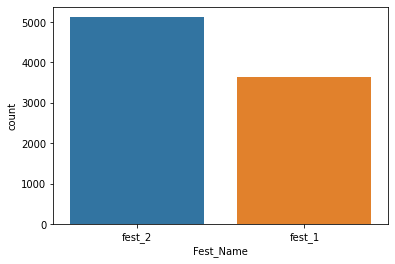

In [78]:
sns.countplot(x=df_common["Fest_Name"])

<AxesSubplot:xlabel='Club_Name', ylabel='count'>

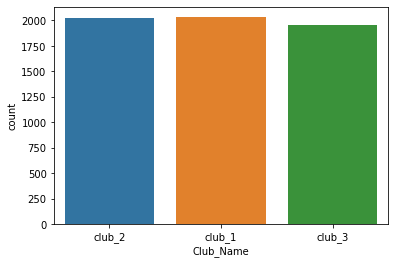

In [79]:
sns.countplot(x=df_common["Club_Name"])

<AxesSubplot:xlabel='Event_x', ylabel='count'>

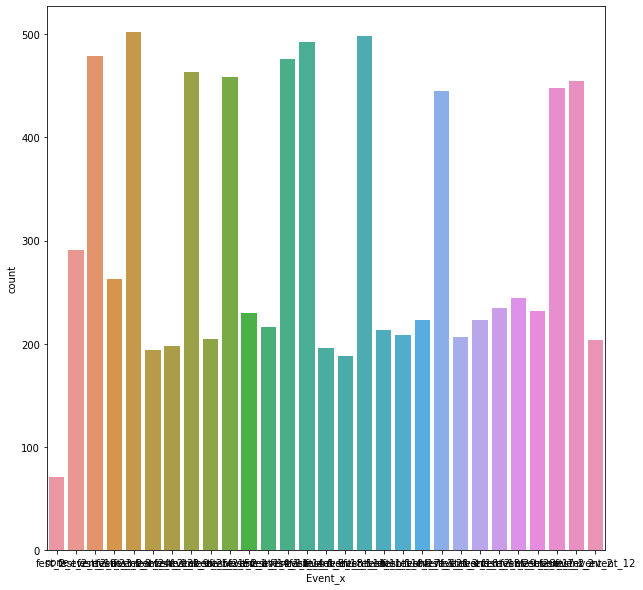

In [84]:
plt.figure(figsize=(10,10))
sns.countplot(x=df_common["Event_x"])

<AxesSubplot:xlabel='Event_y', ylabel='count'>

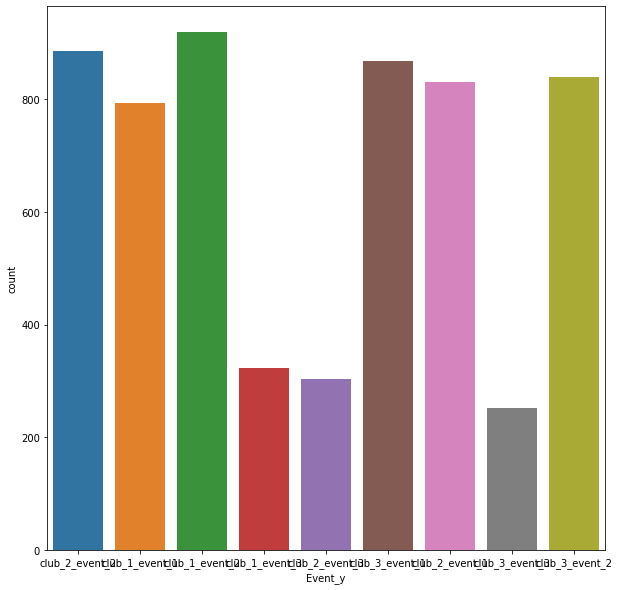

In [85]:
plt.figure(figsize=(10,10))
sns.countplot(x=df_common["Event_y"])

<AxesSubplot:xlabel='Role_x', ylabel='count'>

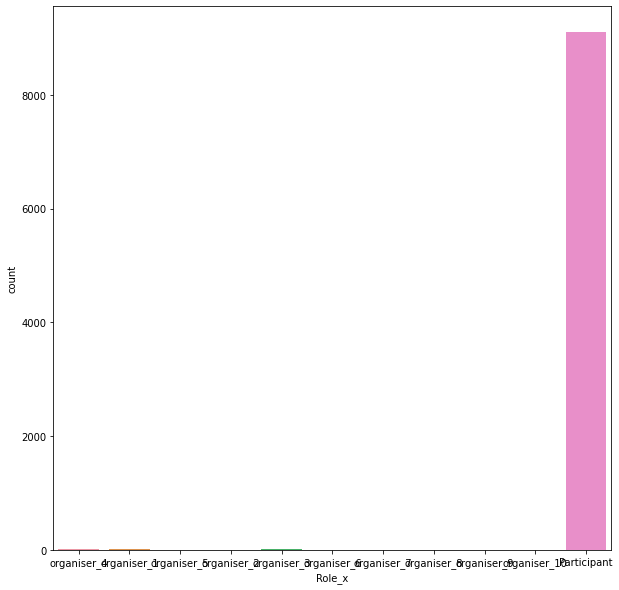

In [86]:
plt.figure(figsize=(10,10))
sns.countplot(x=df_common["Role_x"])

<AxesSubplot:xlabel='Role_y', ylabel='count'>

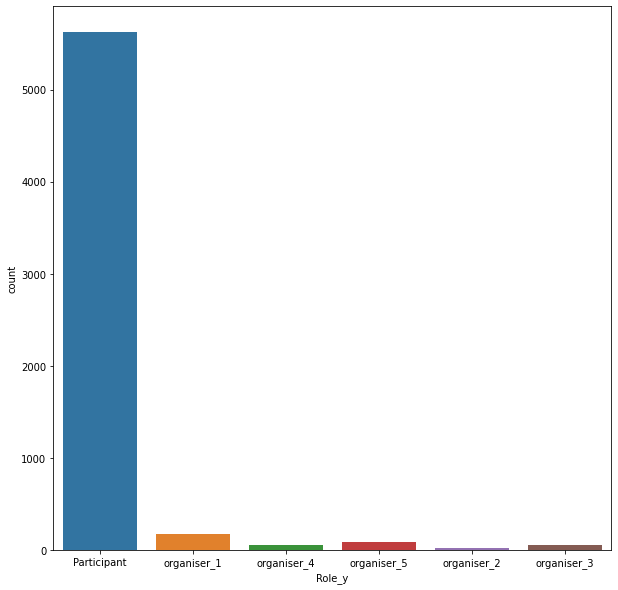

In [87]:
plt.figure(figsize=(10,10))
sns.countplot(x=df_common["Role_y"])

([<matplotlib.patches.Wedge at 0x7f3f6a086690>,
 [Text(0.5520922316635423, 0.9514169263455269, 'club_1'),
  Text(-1.1, 1.3471114790620887e-16, 'club_2'),
  Text(0.5520922316635417, -0.9514169263455272, 'club_3')],
 [Text(0.30114121727102305, 0.5189546870975601, '33%'),
  Text(-0.6, 7.347880794884119e-17, '33%'),
  Text(0.3011412172710227, -0.5189546870975602, '33%')])

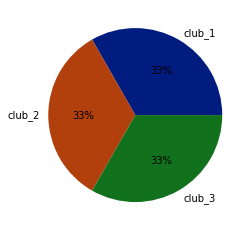

In [93]:
club_data=[club_1,club_2,club_3]
palette_color = sns.color_palette('dark')

# explode = [0, 0.1, 0, 0, 0]
keys=['club_1','club_2','club_3']
# plotting data on chart
plt.pie(club_data, labels=keys, colors=palette_color,
         autopct='%.0f%%')

([<matplotlib.patches.Wedge at 0x7f3f6a04a490>,
 [Text(0.2681674411822793, 1.0668112407964911, 'fest_1'),
  Text(-0.2681674411822799, -1.066811240796491, 'fest_2')],
 [Text(0.1462731497357887, 0.5818970404344496, '42%'),
  Text(-0.14627314973578903, -0.5818970404344496, '58%')])

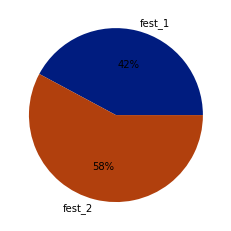

In [94]:
club_data=[fest_1,fest_2]
palette_color = sns.color_palette('dark')

# explode = [0, 0.1, 0, 0, 0]
keys=['fest_1','fest_2']
# plotting data on chart
plt.pie(club_data, labels=keys, colors=palette_color,
         autopct='%.0f%%')

In [95]:
df_common['Event_x'].value_counts()

fest_2_event_4     502
fest_1_event_1     498
fest_1_event_5     493
fest_2_event_3     479
fest_1_event_4     476
fest_2_event_5     463
fest_2_event_1     459
fest_1_event_2     455
fest_2_event_2     448
fest_1_event_3     445
fest_2_event_10    291
fest_2_event_8     263
fest_2_event_6     244
fest_1_event_9     235
fest_2_event_7     232
fest_2_event_14    230
fest_1_event_12    223
fest_1_event_13    223
fest_2_event_11    216
fest_1_event_10    213
fest_1_event_7     208
fest_1_event_6     207
fest_2_event_15    205
fest_2_event_12    204
fest_2_event_9     198
fest_1_event_8     196
fest_2_event_13    194
fest_1_event_11    188
none                71
Name: Event_x, dtype: int64

In [ ]:
# plt.bar(df_common['']
# plt.bar(x, y2, bottom=y1, color='b')